<a href="https://colab.research.google.com/github/MoMahmoud8/Traffic-Sign-Recognition/blob/main/traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mostafamahmoudhassan
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:03<00:00, 197MB/s]


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
df_train = pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv')
df_test = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')

In [ ]:
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [ ]:
classes.values()

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons'])

In [5]:
# getting only the Path and ClassId 
df_train = df_train[['ClassId', 'Path']]
df_test = df_test[['ClassId', 'Path']]

In [6]:
# add the complete path
df_train['Path'] = df_train['Path'].apply(lambda x: '/content/gtsrb-german-traffic-sign/' + x)
df_test['Path'] = df_test['Path'].apply(lambda x: '/content/gtsrb-german-traffic-sign/' + x)

In [ ]:
df_test

,ClassId,Path
0,16,/content/gtsrb-german-traffic-sign/Test/00000.png
1,1,/content/gtsrb-german-traffic-sign/Test/00001.png
2,38,/content/gtsrb-german-traffic-sign/Test/00002.png
3,33,/content/gtsrb-german-traffic-sign/Test/00003.png
4,11,/content/gtsrb-german-traffic-sign/Test/00004.png
...,...,...
12625,12,/content/gtsrb-german-traffic-sign/Test/12625.png
12626,33,/content/gtsrb-german-traffic-sign/Test/12626.png
12627,6,/content/gtsrb-german-traffic-sign/Test/12627.png
12628,7,/content/gtsrb-german-traffic-sign/Test/12628.png


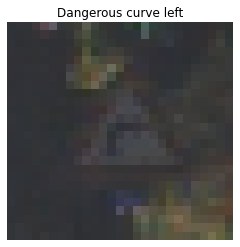

In [ ]:
img=plt.imread(df_train['Path'][0])
fig,ax=plt.subplots(figsize=(8,4))
ax.imshow(img)
ax.set_title(classes[df_train['ClassId'][0]])
ax.axis('off')
plt.show()

In [7]:
# Split the data into training and validation sets
train_data = df_train.sample(frac=0.8, random_state=0) #randomly select 80%
valid_data = df_train.drop(train_data.index)


In [ ]:
valid_data

,ClassId,Path
10,20,/content/gtsrb-german-traffic-sign/Train/20/00...
11,20,/content/gtsrb-german-traffic-sign/Train/20/00...
13,20,/content/gtsrb-german-traffic-sign/Train/20/00...
19,20,/content/gtsrb-german-traffic-sign/Train/20/00...
21,20,/content/gtsrb-german-traffic-sign/Train/20/00...
...,...,...
39167,42,/content/gtsrb-german-traffic-sign/Train/42/00...
39175,42,/content/gtsrb-german-traffic-sign/Train/42/00...
39176,42,/content/gtsrb-german-traffic-sign/Train/42/00...
39182,42,/content/gtsrb-german-traffic-sign/Train/42/00...


In [ ]:
train_data

,ClassId,Path
19138,12,/content/gtsrb-german-traffic-sign/Train/12/00...
21703,13,/content/gtsrb-german-traffic-sign/Train/13/00...
32087,31,/content/gtsrb-german-traffic-sign/Train/31/00...
19762,12,/content/gtsrb-german-traffic-sign/Train/12/00...
13970,9,/content/gtsrb-german-traffic-sign/Train/9/000...
...,...,...
38580,40,/content/gtsrb-german-traffic-sign/Train/40/00...
23421,15,/content/gtsrb-german-traffic-sign/Train/15/00...
17803,11,/content/gtsrb-german-traffic-sign/Train/11/00...
22431,13,/content/gtsrb-german-traffic-sign/Train/13/00...


In [8]:
# Preprocess the data

from keras.utils import load_img, img_to_array, to_categorical

NUM_CLASSES = len(classes)

def preprocess_data(df,IMG_SIZE = 32):
    X = []
    y = []
    for index, row in df.iterrows():
        img = load_img(row.Path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(to_categorical(row.ClassId, num_classes=NUM_CLASSES))
    return np.array(X), np.array(y)

   

In [ ]:
X_train, y_train = preprocess_data(train_data)
X_valid, y_valid = preprocess_data(valid_data)
X_test, y_test = preprocess_data(df_test) 
print(f'The shape of X_train : {X_train.shape}')
print(f'The shape of y_train : {y_train.shape}')


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [9]:
import keras
es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )
#ReduceLROnPlateau
rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
epochs = 40
# Fit the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[es, rp]
                    )


Epoch 1/40
981/981 [==============================] - 9s 7ms/step - loss: 1.1984 - accuracy: 0.6571 - val_loss: 0.1842 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 2/40
981/981 [==============================] - 6s 6ms/step - loss: 0.2590 - accuracy: 0.9187 - val_loss: 0.0810 - val_accuracy: 0.9770 - lr: 0.0010
Epoch 3/40
981/981 [==============================] - 6s 6ms/step - loss: 0.1628 - accuracy: 0.9496 - val_loss: 0.0508 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 4/40
981/981 [==============================] - 7s 7ms/step - loss: 0.1241 - accuracy: 0.9625 - val_loss: 0.0496 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 5/40
981/981 [==============================] - 7s 7ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0330 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 6/40
981/981 [==============================] - 6s 6ms/step - loss: 0.0894 - accuracy: 0.9725 - val_loss: 0.0310 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 7/40
981/981 [==============================] - 7s 7ms/step - lo

In [ ]:
model.save("my_model.h5")

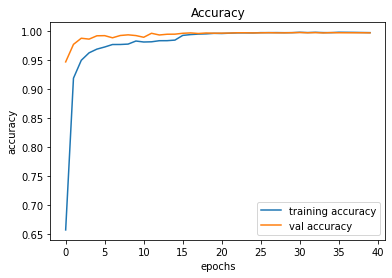

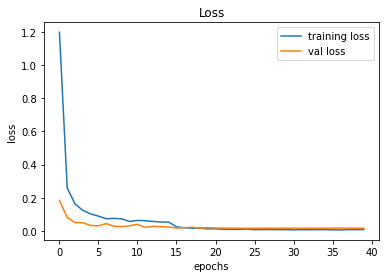

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

395/395 [==============================] - 1s 3ms/step


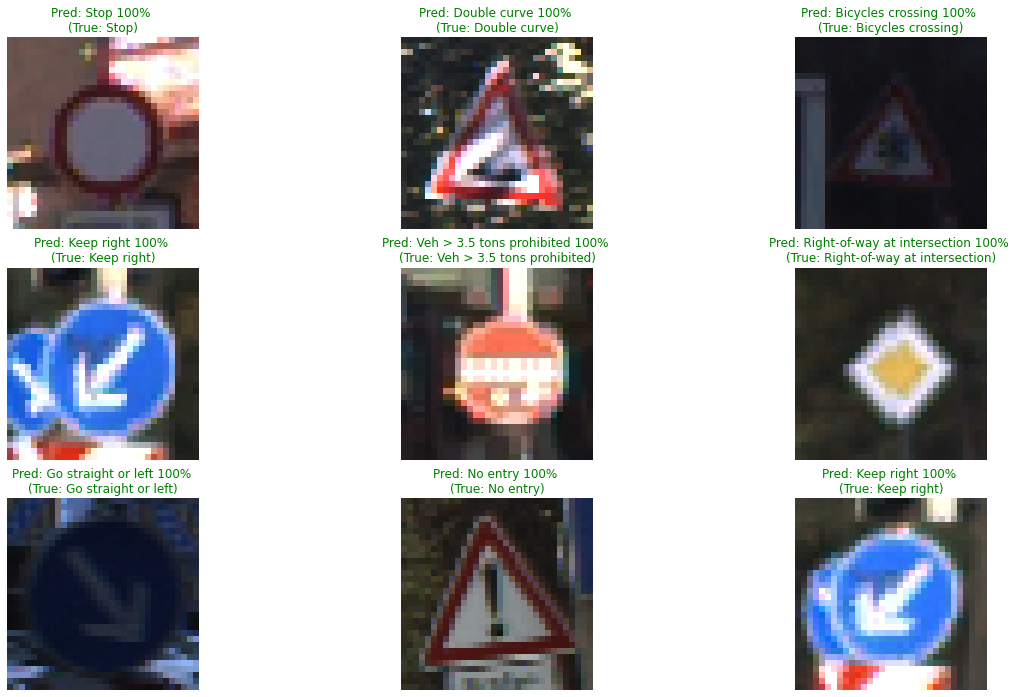

In [ ]:
# Get 9 random numbers
import random
rand_img = random.sample(range(len(X_test)), 9)

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.ravel()
for i in range(9):
  # Plot the image
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

  # Get the predicted and actual label indices
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
     color = "green"
  else:
     color = "red"

  # Set the label text
  axs[i].set_title("Pred: {} {:2.0f}% \n(True: {})".format(classes[pred_label],
                                                   100*tf.reduce_max(y_pred),
                                                   classes[true_label]),
             color=color) # set the color to green or red
  axs[i].axis('off')
plt.show()